## Семинар 2 "Распознавание рукописных цифр"

ФИО: Галицкий Игорь Олегович

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [17]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
%matplotlib inline



In [18]:
import numpy as np

class Linear:
    def __init__(self, input_size, output_size):        
        '''
        Creates weights and biases for linear layer.
        Dimention of inputs is *input_size*, of output: *output_size*.
        '''
        #### YOUR CODE HERE
        #### Create weights, initialize them with samples from N(0, 0.1).
        
        self.w = np.random.normal(0,0.1, (input_size+1, output_size))
        
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, input_size)
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        self.X = np.append(X, np.ones((X.shape[0],1)), axis=1)
        
        self.y = np.dot(self.X, self.w)
        return self.y
    
    def backward(self, dLdy):
        '''
        dLdy [N, output_size]
        '''
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        #### YOUR CODE HERE
        self.dLdw = np.dot(self.X.T, dLdy)
        self.dLdx = np.dot(dLdy, self.w.T)

        return self.dLdx[:,:(self.X.shape[1]-1)]
    
    def step(self, learning_rate):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l*dLdw
        '''
        #### YOUR CODE HERE
        
        self.w = self.w - learning_rate * self.dLdw

In [19]:
class Sigmoid:
    def __init__(self):
        
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        #### YOUR CODE HERE
        self.X = np.array(X)
        self.sig = 1 / (1 + np.exp(-self.X))
        return self.sig
        
       
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        
        return dLdy * self.sig * (1 - self.sig)
    
    def step(self, learning_rate):
        pass

In [20]:
class NLLLoss:
    def __init__(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        #### YOUR CODE HERE
        #### (Hint: No code is expected here, just joking)
        pass
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        y is np.array of size (N,), contains correct labels
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        self.X = X
        Xmax = np.max(X,axis=1) # keep axis 0 (different points) intact
        self.L = X[range(X.shape[0]),y] - Xmax - np.log( # trigger NumPy's "smart indexing" by feeding both array-like
            np.sum( # log-sum-exp to avoid floating overflows
                np.exp(
                    (X.T-Xmax).T # hooray for NumPy broadcasting
                ),
                axis=1
            )
        )
        
        return -self.L
        
          
    def backward(self):
        '''
        Note that here dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        local_max = np.max(self.X,axis=1)
        self.dLdx = -np.exp(
            self.X.T - local_max - np.log(
                np.sum(
                    np.exp(self.X.T-local_max),
                    axis=0
                )
            )
        ).T
        self.dLdx[range(X.shape[0]),y] += 1
        self.dLdx = -self.dLdx # *negative*
        
        return self.dLdx
        

In [21]:
class NeuralNetwork:
    def __init__(self, modules):
        '''
        Constructs network with *modules* as its layers
        '''
        #### YOUR CODE HERE

        self.list = []
        for m in modules:
            self.list.append(m)
    
    def forward(self, X):
        #### YOUR CODE HERE
        #### Apply layers to input
        XX = np.array(X)
        for i in self.list:
            XX = i.forward(XX)
        return XX
    
    def backward(self, dLdy):
        '''
        dLdy here is a gradient from loss function
        '''
        #### YOUR CODE HERE
        QQ = dLdy
        for i in self.list[::-1]:
            QQ = i.backward(QQ)
        return QQ
    
    def step(self, learning_rate):
        for l in self.list:
            l.step(learning_rate)
            

In [22]:
to_numpy = lambda x: x.numpy()
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [23]:
## Usage example:
for X, y in train_loader:
    X = X.view(X.size(0), -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    pass

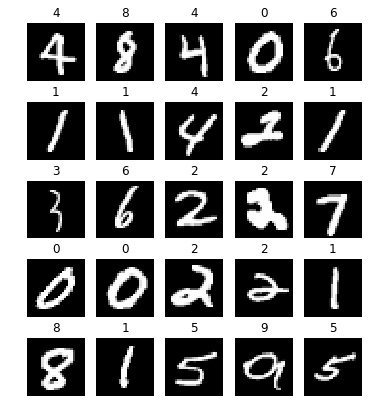

In [24]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [25]:
def train(train_loader, model, lr = 0.01):
    lr = 0.01
    loss = NLLLoss()
    losts = []
    for X, y in train_loader:
        X = X.view(X.size(0), -1)
        X = X.numpy() ### Converts torch.Tensor to numpy array
        y = y.numpy()
        luz = model.forward(X)
        losts.append(loss.forward(luz, y))
        model.backward(loss.backward())
        model.step(lr)

    losts = np.array(losts).mean(axis=1)
    plt.plot(losts)
    plt.show()

In [26]:
lr = 0.01
terminator = NeuralNetwork([Linear(784,100), Sigmoid(), Linear(100,100), Sigmoid(), Linear(100,10)])
loss = NLLLoss()
losts = []

for X, y in train_loader:
    X = X.view(X.size(0), -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    luz = terminator.forward(X)
    losts.append(loss.forward(luz, y))
    terminator.backward(loss.backward())
    terminator.step(lr)


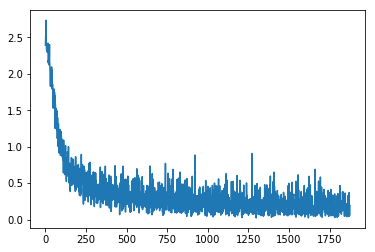

In [27]:
losts = np.array(losts).mean(axis=1)
plt.plot(losts)
plt.show()

In [28]:
answer =[]
answer = np.array(answer)

y_ans = []
y_ans = np.array(y_ans)

for T,y_hat in test_loader:
    
    T = T.view(T.size(0), -1)
    T = T.numpy() ### Converts torch.Tensor to numpy array
    y_hat = y_hat.numpy()
    ans = terminator.forward(T)
    ans = ans.argmax(axis=1)
    answer = np.hstack((answer,ans))
    y_ans = np.hstack((y_ans,y_hat))
    
    


In [29]:
from collections import Counter

def accuracy(x,y):
    num = Counter(x).most_common(1)[0][0]
    x_1 = np.array(map(lambda x: int(x==num), x))
    y_1 = np.array(map(lambda x: int(x==num), y))
    not_x = np.array(map(lambda x: int(x!=num), x))
    not_y = np.array(map(lambda x: int(x!=num), y))

    an = float(sum(x_1*y_1) + sum(not_x*not_y)) / float(x.shape[0])
    return an

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(answer, y_ans)

0.94499999999999995

### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

# ReLU

In [31]:
class ReLU:
    def __init__(self):
        
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        #### YOUR CODE HERE
        self.X = np.array(X)
        
        
    
        self.Relu = np.maximum(self.X, 0)
        
        return self.Relu
        
       
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        A = self.Relu 
        A[A>0] = 1
        return dLdy * A

    
    def step(self, learning_rate):
        pass

In [32]:
lr = 0.01
terminatorRelu = NeuralNetwork([Linear(784,100), ReLU(), Linear(100,100), ReLU(), Linear(100,10)])
loss = NLLLoss()
losts = []

for X, y in train_loader:
    X = X.view(X.size(0), -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    luz = terminatorRelu.forward(X)
    losts.append(loss.forward(luz, y))
    terminatorRelu.backward(loss.backward())
    terminatorRelu.step(lr)



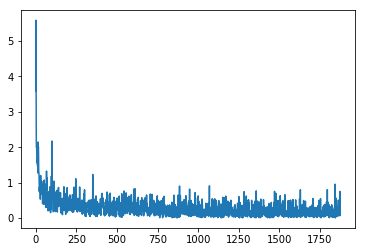

In [33]:
losts = np.array(losts).mean(axis=1)
plt.plot(losts)
plt.show()

In [34]:
answer =[]
answer = np.array(answer)

y_ans = []
y_ans = np.array(y_ans)

for T,y_hat in test_loader:
    
    T = T.view(T.size(0), -1)
    T = T.numpy() ### Converts torch.Tensor to numpy array
    y_hat = y_hat.numpy()
    ans = terminatorRelu.forward(T)
    ans = ans.argmax(axis=1)
    answer = np.hstack((answer,ans))
    y_ans = np.hstack((y_ans,y_hat))
    



In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(answer, y_ans)

0.95199999999999996

# ELU

In [41]:
class ELU:
    def __init__(self):
        
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        #### YOUR CODE HERE
        self.alpha = 1
        self.X = np.array(X)
        
        A = self.X
        A[A<=0] = self.alpha*(np.exp(A[A<0])-1)
        
        self.ELU = A
        
        return self.ELU
        
       
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        A = self.ELU
        A[A>0] = 1
        A[A<=0]+= self.alpha
        return dLdy * A

    
    def step(self, learning_rate):
        pass

In [ ]:

lr = 0.01
terminatorElu = NeuralNetwork([Linear(784,100), ELU(), Linear(100,100), ELU(), Linear(100,10)])
loss = NLLLoss()
losts = []

for X, y in train_loader:
    X = X.view(X.size(0), -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    luz = terminatorElu.forward(X)
    losts.append(loss.forward(luz, y))
    terminatorElu.backward(loss.backward())
    terminatorElu.step(lr)



In [ ]:
losts = np.array(losts).mean(axis=1)
plt.plot(losts)
plt.show()

In [ ]:
answer =[]
answer = np.array(answer)

y_ans = []
y_ans = np.array(y_ans)

for T,y_hat in test_loader:
    
    T = T.view(T.size(0), -1)
    T = T.numpy() ### Converts torch.Tensor to numpy array
    y_hat = y_hat.numpy()
    ans = terminatorElu.forward(T)
    ans = ans.argmax(axis=1)
    answer = np.hstack((answer,ans))
    y_ans = np.hstack((y_ans,y_hat))
    

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(answer, y_ans)

Accuracy для различных методов:
1) sigmoid = 0.94720000000000004
2) ReLU = 0.94589999999999996
3) ELU = 0.9466

### Часть 3: Предобработка данных

Посчитайте на всей обучающей выборке матрицу ковариации и среднее. Нормализуйте данные по схеме: вычесть среднее, декоррелировать, нормировать дисперсию. Сравните графики обучения на одной и той же архитектуре с и без предобработки.

In [45]:
# берем первые 200 бачей

i = 0
for X, y in train_loader:
   
    X = X.view(X.size(0), -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    if i == 0:
        X_all = X
        y_all = y
    else:
        X_all = np.vstack((X_all,X))
        y_all = np.hstack((y_all,y))
    i+=1
    if i == 100:
        break


In [46]:
X_all_1 = X_all - X_all.mean(axis=0)


In [47]:
Cov = np.cov(X_all_1)

In [28]:
#Cov += 0.7*np.ones(Cov.shape)

In [48]:
INV = np.linalg.inv(Cov)

In [50]:
import scipy
half = scipy.linalg.sqrtm(INV)

In [114]:
X_hat = half.dot(X_all_1)

In [115]:
print np.cov(X_hat)

[[ 30585.45711138  30585.93811175  -4131.15913524 ...,  -7088.25203745
   21471.45792017   6459.59355403]
 [ 30585.93811175  40054.05680945  -8571.5544394  ...,  -7760.59154183
   14625.76577464   8030.12885919]
 [ -4131.15913524  -8571.5544394   10606.23162414 ...,  -4709.42552306
   -1811.85724598  -4838.42319868]
 ..., 
 [ -7088.25203745  -7760.59154183  -4709.42552306 ...,  10006.78779574
   -3132.69729425   3877.45475222]
 [ 21471.45792017  14625.76577464  -1811.85724598 ...,  -3132.69729425
   27561.30629452   4800.54685065]
 [  6459.59355403   8030.12885919  -4838.42319868 ...,   3877.45475222
    4800.54685065   7600.70748754]]


In [104]:
X_hat = X_hat/(X_hat.std(axis=0))

In [105]:
lr = 0.01
terminator_not_cor = NeuralNetwork([Linear(784,100), Sigmoid(), Linear(100,100), Sigmoid(), Linear(100,10)])
loss = NLLLoss()
losts_not_cor = []
i = 0
for X, y in train_loader:
    
    X = X.view(X.size(0), -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    luz = terminator_not_cor.forward(X)
    losts_not_cor.append(loss.forward(luz, y))
    terminator_not_cor.backward(loss.backward())
    terminator_not_cor.step(lr)
    if i == 200:
        break
    i+=1

In [106]:
lr = 0.01
terminator_cor = NeuralNetwork([Linear(784,100), Sigmoid(), Linear(100,100), Sigmoid(), Linear(100,10)])
loss = NLLLoss()
losts_cor = []
y_all = y_all

for i in range(1,100):
    
    X = X_hat[(i-1)*32:i*32,:]
    
    y = y_all[(i-1)*32:i*32]
    
    luz = terminator_cor.forward(X)
    losts_cor.append(loss.forward(luz, y))
    terminator_cor.backward(loss.backward())
    terminator_cor.step(lr)
    

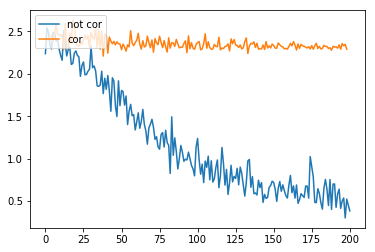

In [107]:
losts_not_cor = np.array(losts_not_cor).mean(axis=1)
losts_cor = np.array(losts_cor).mean(axis=1)
plt.plot(losts_not_cor)
plt.plot(losts_cor)
plt.legend(['not cor',
            'cor'],    
            loc='upper left') 
plt.show()

### Часть 4: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?